In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [168]:
df = pd.read_csv('Crime.csv')

C:\Users\Akshay Gupta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [169]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [170]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [171]:
df.index = pd.DatetimeIndex(df.Date)


In [172]:
df.Date= pd.to_datetime(df.Date)

In [173]:
df['month'] = pd.DatetimeIndex(df['Date']).month

In [174]:
#df['Date'] = pd.DatetimeIndex(df['Date']).date

In [175]:
df['date'] = pd.DatetimeIndex(df['Date']).day

In [177]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,date
Date,,,,,,,,,,,
2012-12-31 23:15:00,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,31
2012-12-31 22:00:00,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,31
2012-12-31 22:00:00,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,31
2012-12-31 22:00:00,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,31
2012-12-31 21:30:00,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,31


In [178]:
df.describe()

,ID,Beat,Year,month,date
count,1.916410e+05,191641.000000,191641.000000,191641.000000,191641.000000
mean,4.968629e+06,1258.810771,2006.134940,6.611518,15.771698
std,2.342997e+06,702.530465,3.520285,3.433006,8.771161
min,1.310022e+06,111.000000,2001.000000,1.000000,1.000000
25%,2.832144e+06,722.000000,2003.000000,4.000000,8.000000
50%,4.762956e+06,1121.000000,2006.000000,7.000000,16.000000
75%,7.201878e+06,1733.000000,2009.000000,10.000000,23.000000
max,9.181151e+06,2535.000000,2012.000000,12.000000,31.000000


In [179]:
df.month.value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: month, dtype: int64

In [180]:
df['week-day'] = pd.DatetimeIndex(df['Date']).dayofweek

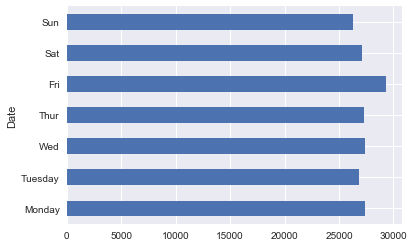

In [181]:
days= ['Monday','Tuesday','Wed','Thur','Fri','Sat','Sun']
df.groupby([df.index.dayofweek]).size().plot(kind='barh')
plt.yticks(np.arange(7),days)
plt.show()

In [185]:
total_arrest = df.query('Arrest ==True')
total_arrest.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,date,week-day
Date,,,,,,,,,,,,
2012-12-31 20:30:00,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,12,31,0
2012-12-31 19:00:00,8951802,2012-12-31 19:00:00,STREET,True,False,1021,10,29,2012,12,31,0
2012-12-31 16:20:00,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012,12,31,0
2012-12-30 19:46:00,8949895,2012-12-30 19:46:00,ALLEY,True,False,2512,25,18,2012,12,30,6
2012-12-30 15:00:00,8949557,2012-12-30 15:00:00,STREET,True,False,2535,25,23,2012,12,30,6


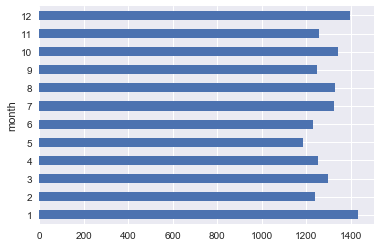

In [187]:
total_arrest.groupby(['month']).size().plot(kind='barh')
plt.ylabel('month')
plt.show()

In [151]:
df['week-day'].value_counts()   #0=monday

4    29284
2    27416
0    27397
3    27319
5    27118
1    26791
6    26316
Name: week-day, dtype: int64

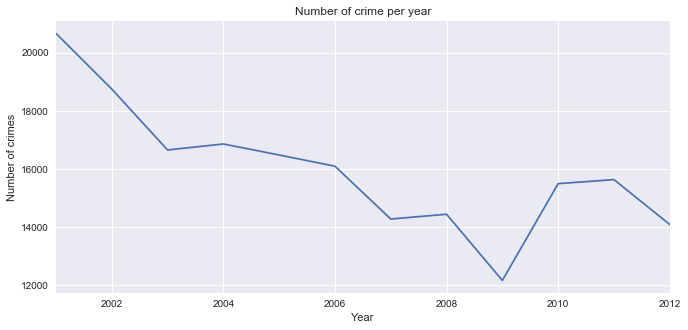

In [152]:
plt.figure(figsize=(11,5))
df.resample('Y').size().plot()
plt.title('Number of crime per year')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.show()

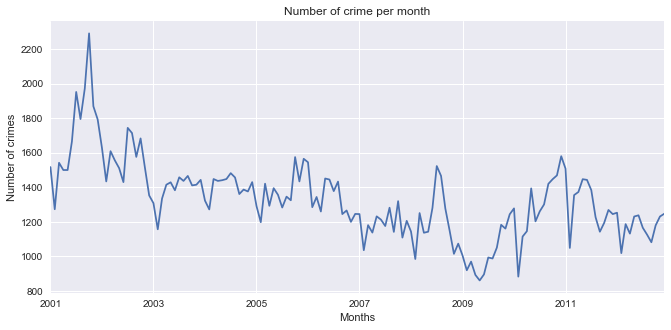

In [115]:
plt.figure(figsize=(11,5))
df.resample('M').size().plot(legend=False)
plt.title('Number of crime per month')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

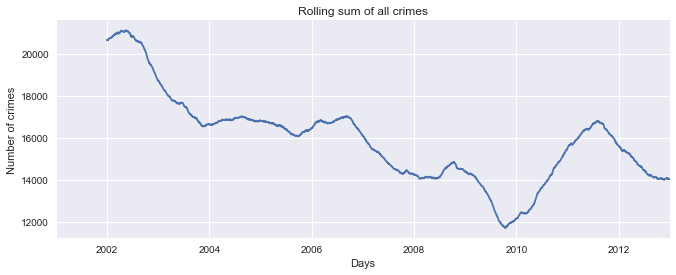

In [116]:
plt.figure(figsize=(11,4))
df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes')
plt.xlabel('Days')
plt.ylabel('Number of crimes')
plt.show()

In [117]:
arrest_2001 = df.query('Arrest ==True  & Year == 2001')
len(arrest_2001)/len(df[df.Year==2001])

0.10411727708161982

In [118]:
arrest_2007 = df.query('Arrest ==True  & Year == 2007')
len(arrest_2007)/len(df[df.Year==2007])

0.08487394957983194

In [119]:
df.LocationDescription.value_counts().head(6)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [123]:
Top5 = df.query("LocationDescription in ['STREET','PARKING LOT/GARAGE(NON.RESID.)','ALLEY','GAS STATION','DRIVEWAY - RESIDENTIAL']")
len(Top5)

177510

In [124]:
df_gas_station = df[df.LocationDescription=='GAS STATION']
len(df_gas_station)

2111

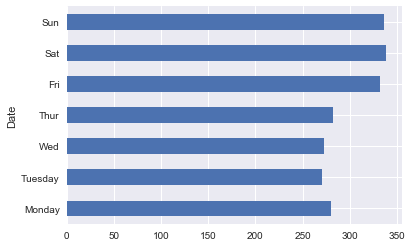

In [125]:
days= ['Monday','Tuesday','Wed','Thur','Fri','Sat','Sun']
df_gas_station.groupby([df_gas_station.index.dayofweek]).size().plot(kind='barh')
plt.yticks(np.arange(7),days)
plt.show()